## Data Analysis - Descriptive and Summary and Visualization
In this notebook, we will perform a statistical summary and visualization of the preprocessed dataset. This will help us understand the distribution of key features and identify patterns in the data.

Below are the steps followed:
1. Load the preprocessed datasets from base directory.
2. Distribution of Posts by Hour Across Subreddits
3. Distribution of Posts based on subreddit
4. Correlation between the post length and the score
5. Correlation between title length and the score



In [1]:
import os
import pandas as pd
from pathlib import Path
import re
import csv
import hashlib
import ast

print(os.getcwd())
os.chdir("OriginalRedditDataSet/Preprocessed_Data/")
print(os.getcwd())

d:\Data602\Project\VentBuddy-A-Data-Driven-Companion-for-Mental-Health-Support
d:\Data602\Project\VentBuddy-A-Data-Driven-Companion-for-Mental-Health-Support\OriginalRedditDataSet\Preprocessed_Data


In [2]:
df = pd.read_csv('anx_data_cleaned.csv')
df.head()

,score,selftext,subreddit,title,timestamp
0,4,hello all. \n\nmy wife has anxiety and lately...,anxiety,wife has anxiety. how can i help?,2019-04-30 23:50:25
1,4,i wanted to write this because i feel there’s ...,anxiety,my anxiety’s kryptonite.,2019-04-30 23:31:49
2,2,"hi all, so i've been taking effexor xr 75 mg f...",anxiety,"while taking effexor, is it okay to take cloni...",2019-04-30 23:06:20
3,8,hi guys!\n\ni've finally come to the conclusio...,anxiety,"after accepting you need help, what was the fi...",2019-04-30 22:49:27
4,1,"essentially, i've had everything from poor sle...",anxiety,i've spent the last few months suffering a ser...,2019-04-30 22:30:12


In [3]:
dep_df=pd.read_csv('dep_data_cleaned.csv')
dep_df.head()

,score,selftext,subreddit,title,timestamp
0,3,does anybody else experience “depression attac...,depression,depression attacks?,2019-04-30 23:50:57
1,2,i am struggling pretty hard this week. im mise...,depression,lifes tough and i need to vent,2019-04-30 23:50:23
2,66,when you make a post here on desktop the tab s...,depression,just a funny depression based thought,2019-04-30 23:50:08
3,2,"hey, for a couple of months i just wasn't able...",depression,how do you manage to get something done?,2019-04-30 23:48:12
4,1,“things aren't the way they were before\n\nyou...,depression,been depressed over a “f”wb. have a song that ...,2019-04-30 23:46:04


In [4]:
lon_df=pd.read_csv('lon_data_cleaned.csv')
lon_df.head()

,score,selftext,subreddit,title,timestamp
0,69,i'm 22 but i despise dating. especially online...,lonely,tired of modern dating,2019-04-30 22:43:30
1,2,i have an hour before i go to school i need so...,lonely,an hour,2019-04-30 22:11:18
2,1,"hey guys, i (m21) am new to this reddit and ho...",lonely,thinking about removing contact with everyone,2019-04-30 20:11:59
3,1,as time went on and school ended it got easier...,lonely,my whole life,2019-04-30 18:21:11
4,2,"hi everyone,\n\ni recently created a new sub r...",lonely,new sub r/lifeafterschool for discussing life ...,2019-04-30 16:00:09


In [5]:
mh_df=pd.read_csv('mh_data_cleaned.csv')
mh_df.head()

,score,selftext,subreddit,title,timestamp
0,5,sory sorry i know probably not the place to po...,mentalhealth,i think depreison is makng me insane,2019-04-30 23:59:46
1,9,passing the time can be hard and boring. what'...,mentalhealth,what are your low effort hobbies?,2019-04-30 23:25:01
2,1,my life is falling apart. i have nothing good ...,mentalhealth,why am i so jealous and envious?,2019-04-30 23:01:54
3,4,"like of you see say, physical scars, on a youn...",mentalhealth,"how do manditory reporters (teachers, doctors,...",2019-04-30 22:32:11
4,1,i suffer from dissociative identity disorder (...,mentalhealth,dissociative identity disorder,2019-04-30 22:16:41


In [6]:
sw_df=pd.read_csv('sw_data_cleaned.csv')
sw_df.head()

,score,selftext,subreddit,title,timestamp
0,1,...,suicidewatch,we want to kill ourselves because some of us e...,2019-04-30 23:58:50
1,1,i’m sitting on the couch in hysterics right no...,suicidewatch,feeling pretty bad,2019-04-30 23:51:19
2,1,...,suicidewatch,we want to kill ourselves due to a simple fact...,2019-04-30 23:51:00
3,1,i have the urge to tell someone about my story...,suicidewatch,"a life of shame. i've withdrawn from everyone,...",2019-04-30 23:44:18
4,1,currently caught up in one of the deepest and ...,suicidewatch,i think i’m slowly losing my mind,2019-04-30 23:42:02


### 2. Distribution of Posts by Hour Across Subreddits

In this part, we are looking at what time of day people post in each subreddit. Each line shows the number of posts at every hour, so we can easily see when users are most active. Peaks in the lines tell us the busiest hours for each community.

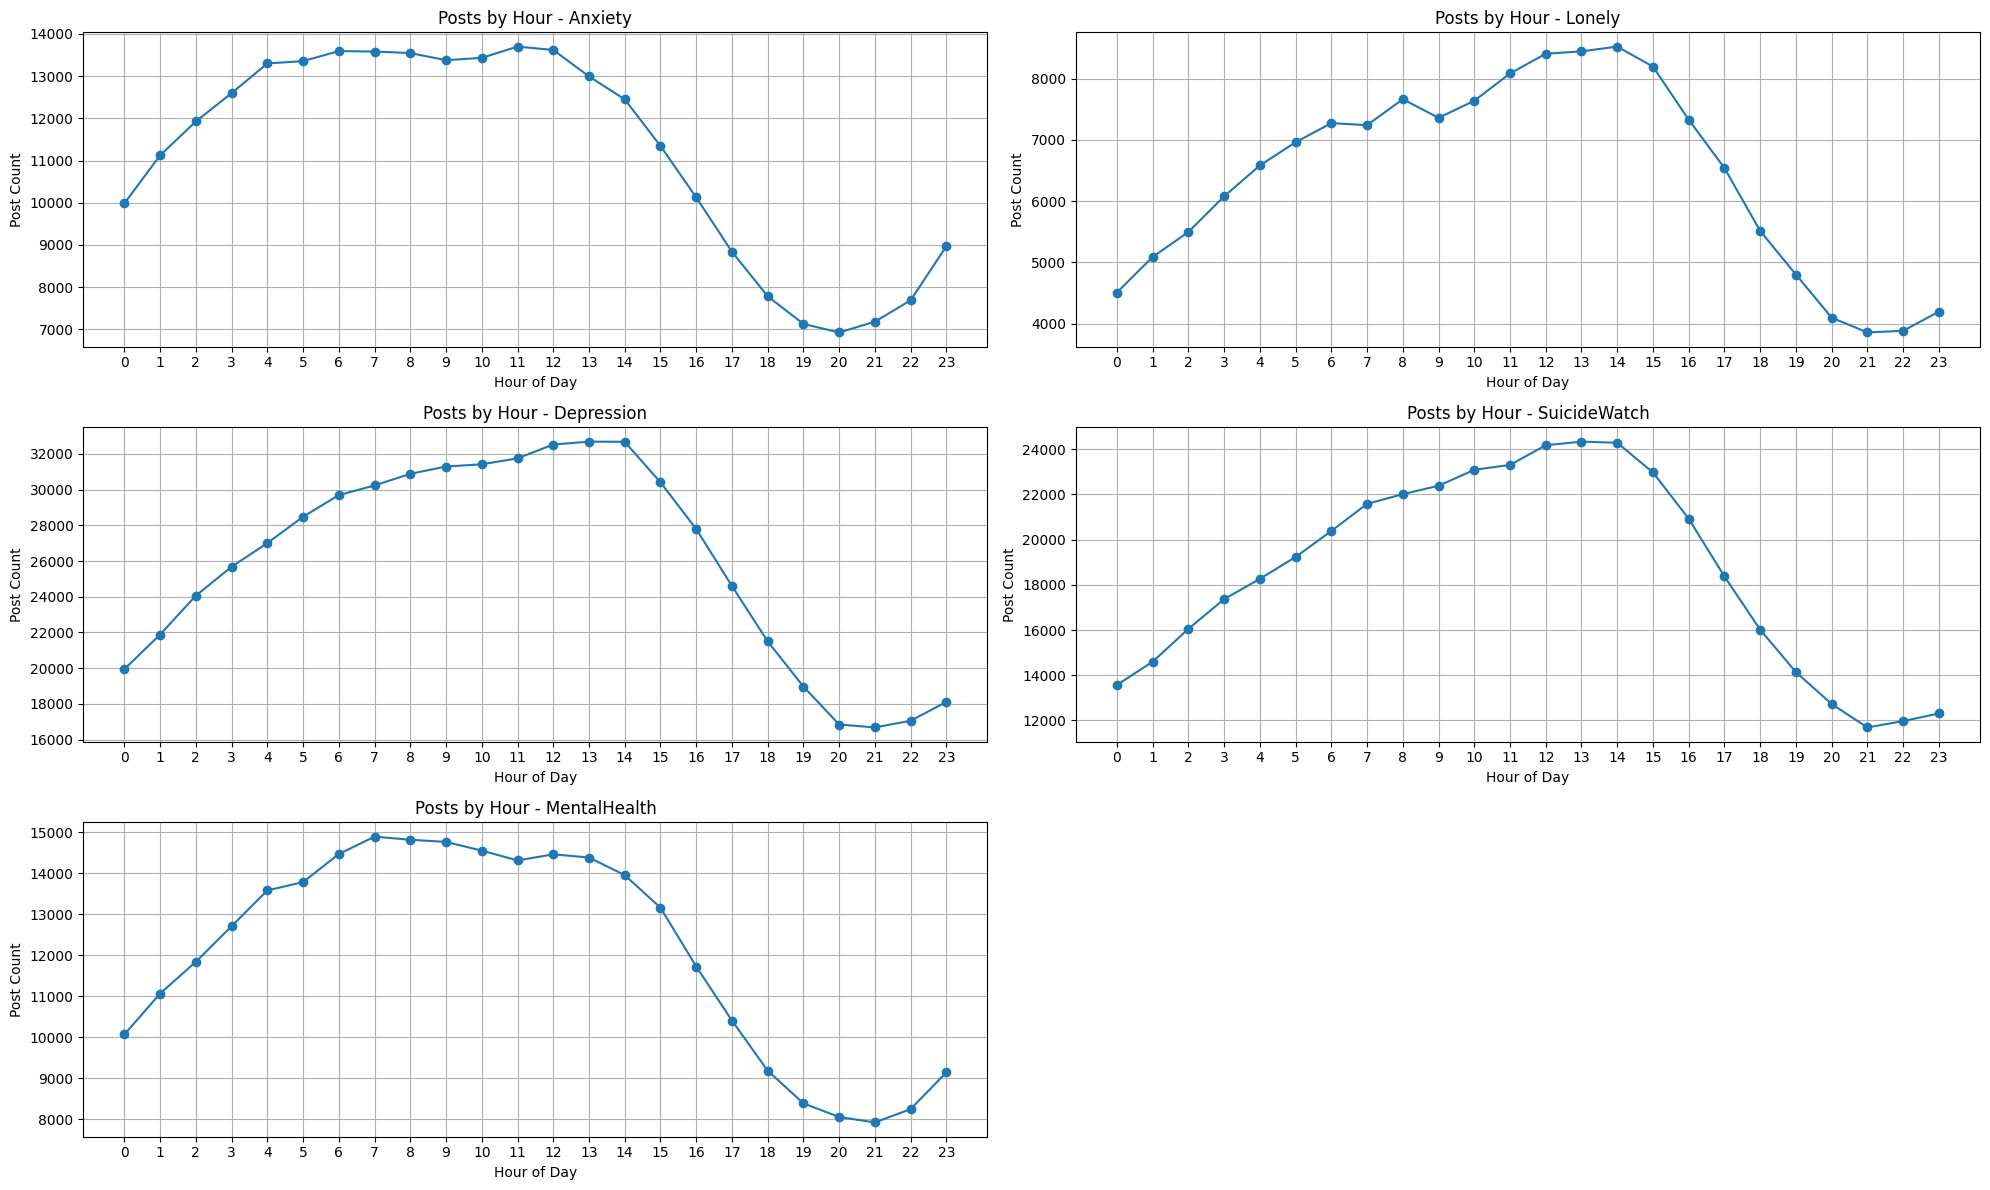

In [7]:
import matplotlib.pyplot as plt

subreddits = {
    "Anxiety": df,
    "Lonely": lon_df,
    "Depression": dep_df,
    "SuicideWatch": sw_df,
    "MentalHealth": mh_df
}

plt.figure(figsize=(20, 12))

for i, (name, data) in enumerate(subreddits.items(), 1):
    data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')
    data['hour'] = data['timestamp'].dt.hour

    hour_counts = data['hour'].value_counts().sort_index()

    plt.subplot(3, 2, i)
    hour_counts.plot(kind='line', marker='o')
    plt.title(f"Posts by Hour - {name}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Post Count")
    plt.xticks(range(0, 24))
    plt.grid(True)

plt.tight_layout()
plt.show()


#### Observations :

*   Anxiety Subreddit :
Posting activity increases steadily from early morning and reaches its highest levels between 11:00 and 13:00. After early afternoon, the number of posts gradually declines, with the lowest activity occurring between 19:00 and 22:00. A slight increase appears again around 23:00. This suggests that anxiety-related posting is more frequent during daytime hours.

*   Lonely Subreddit :
Posts rise gradually through the morning and peak around 12:00 to 14:00. After this point, there is a consistent decline, with minimal activity observed during late evening hours (20:00–22:00). This indicates that individuals expressing loneliness tend to do so more during the day.

*   Depression Subreddit :
This subreddit displays the highest overall posting levels among the five groups. The volume of posts increases strongly in the morning and peaks around 14:00 to 15:00. Posting frequency decreases sharply after 17:00. This pattern may reflect the increased emotional and cognitive load experienced during daytime responsibilities.

*   SuicideWatch Subreddit :
Posting steadily increases throughout the morning, reaching its peak around 13:00 to 14:00. After that, there is a notable reduction in activity. The lowest posting frequency appears in the late evening (20:00–22:00). This suggests that users often seek help or intervention earlier in the day, before late-night declines in activity.

*   MentalHealth Subreddit :
Posts peak earlier compared to the other subreddits, particularly between 07:00 and 09:00. After midday, a gradual decrease is observed, with the lowest point in the evening hours. This trend implies heightened engagement with mental health topics during the beginning of the day.

**Overall Observation** : Across all five mental health–related subreddits, people tend to post much more during the daytime and far less during late evening hours. This pattern suggests that many users turn to these platforms while going through daily routines, stressful interactions, or challenging emotions that arise during the day. When night comes, posting activity drops noticeably, which may indicate that individuals are either disengaging, seeking rest, or turning to other coping strategies rather than posting online. Overall, the timing of posts reflects how strongly mental health struggles can be tied to everyday life pressures and social environments.

### 3. Distribution of Posts based on subreddit

In this part, we are looking at how posts are spread across the different subreddits. The pie chart helps us see which communities have the most activity and which have fewer posts, giving a simple and clear view of the dataset.

subreddit
depression      622131
suicidewatch    445769
mentalhealth    289898
anxiety         268561
lonely          153758
Name: count, dtype: int64


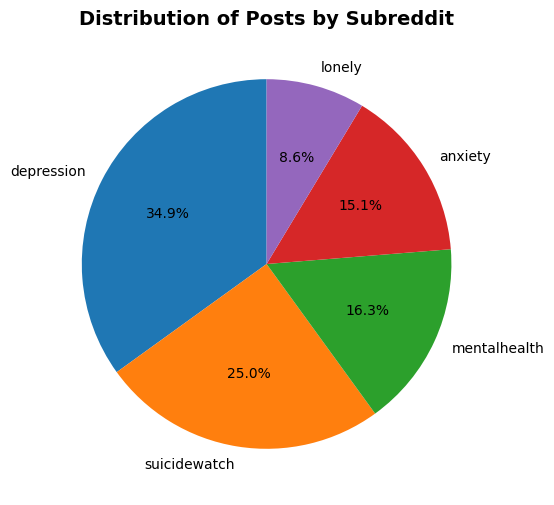

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

combined_df = pd.concat([df, lon_df, dep_df, sw_df, mh_df], ignore_index=True)

subreddit_counts = combined_df['subreddit'].value_counts()

print(subreddit_counts)

plt.figure(figsize=(6,6))
subreddit_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Posts by Subreddit", fontsize=14, weight='bold')
plt.ylabel("")
plt.show()


#### Observations :

*   Depression and Suicide Watch together account for nearly 60% of the data, so they dominate the dataset.
*   Anxiety and Mental Health have moderate representation, around 15–16% each.
*   Anxiety and Mental Health have moderate representation, around 15–16% each.
*   Lonely is the smallest group, with less than 10%.
*   This tells us that the dataset is skewed towards Depression and Suicide Watch, while Lonely posts are relatively few.

### 4. Correlation between the post length and the score

In this section, we are exploring whether the length of a post (number of characters) has any relationship with its score in different subreddits. The heatmaps show the correlation values for each dataset, helping us see if longer posts tend to get higher or lower scores. This gives a clear view of how post length might influence user engagement.

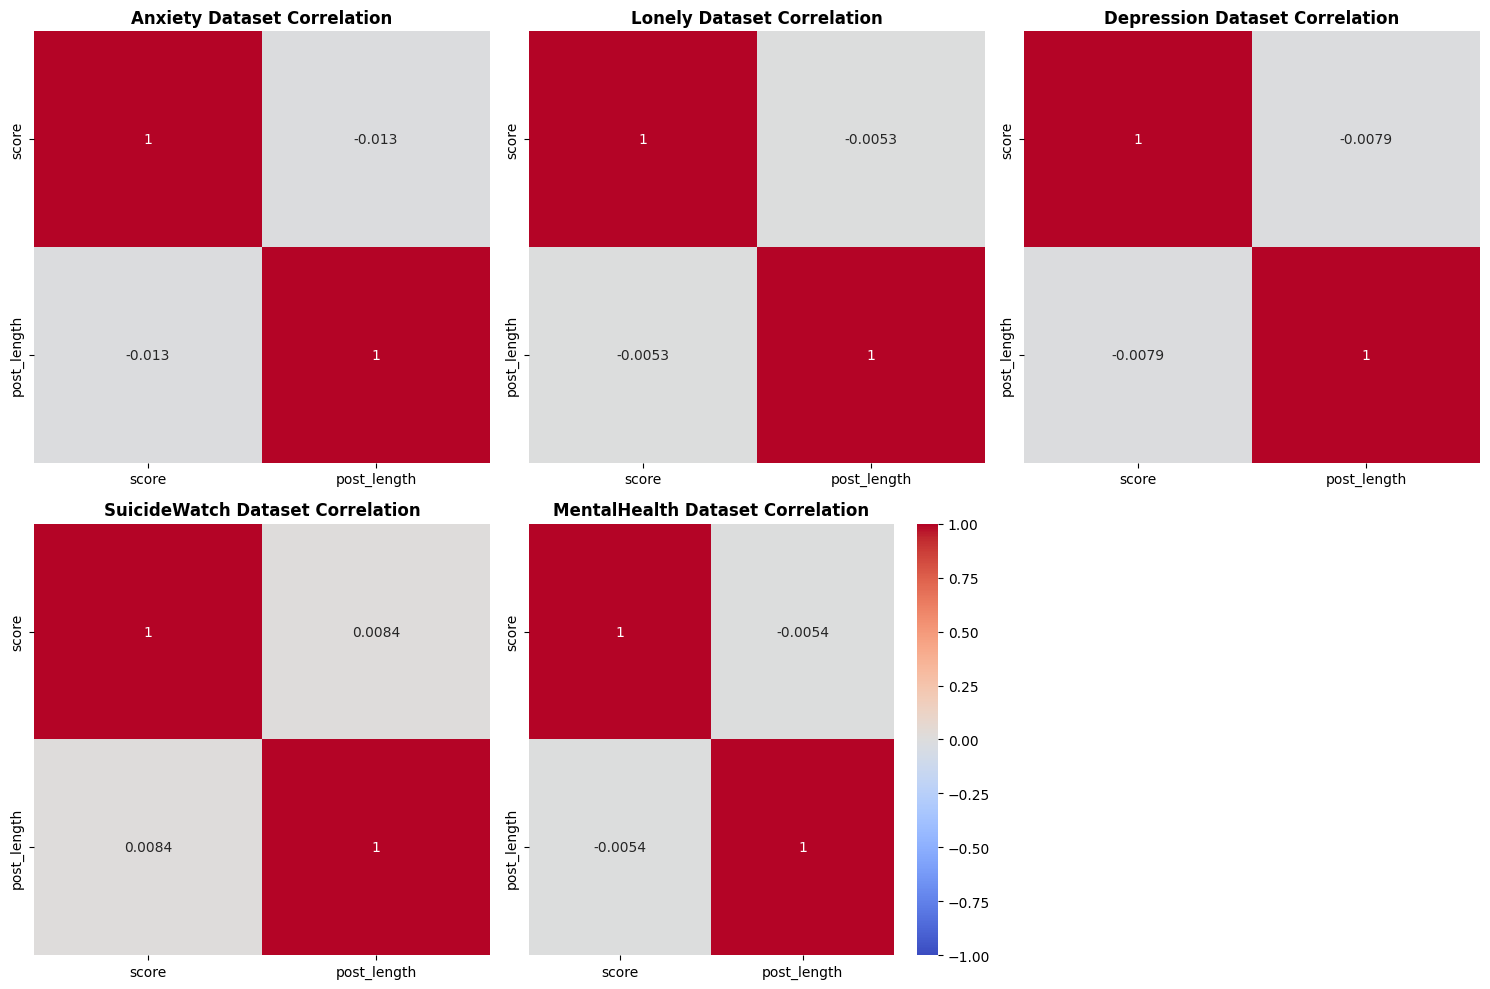

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datasets = {
    'Anxiety': df,
    'Lonely': lon_df,
    'Depression': dep_df,
    'SuicideWatch': sw_df,
    'MentalHealth': mh_df
}
for data in datasets.values():
    data['post_length'] = data['selftext'].astype(str).apply(len)

features = ['score', 'post_length']

plt.figure(figsize=(15, 10))
for i, (name, data) in enumerate(datasets.items(), 1):
    plt.subplot(2, 3, i)
    corr = data[features].corr(method='pearson')
    sns.heatmap(
        corr,
        annot=True,
        cmap='coolwarm',
        vmin=-1, vmax=1,
        cbar=(i == 5)
    )
    plt.title(f"{name} Dataset Correlation", fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


#### Observations :
The correlation heatmaps show that there is almost no relationship between post length and score across all five datasets, Anxiety, Lonely, Depression, SuicideWatch, and MentalHealth. The correlation values are very close to zero, with some being slightly negative and others slightly positive. This indicates that the length of a post does not significantly affect the number of upvotes or engagement it receives. In simpler terms, users’ responses to posts in these mental health communities are not influenced by how long the post is, but likely by its emotional depth or relatability.


### 5. Correlation between title length and the score

In this section, we are exploring whether the length of the title (number of characters) has any relationship with its score in different subreddits. The heatmaps show the correlation values for each dataset, helping us see if longer title tend to get higher or lower scores. This gives a clear view of how title length might influence user engagement.

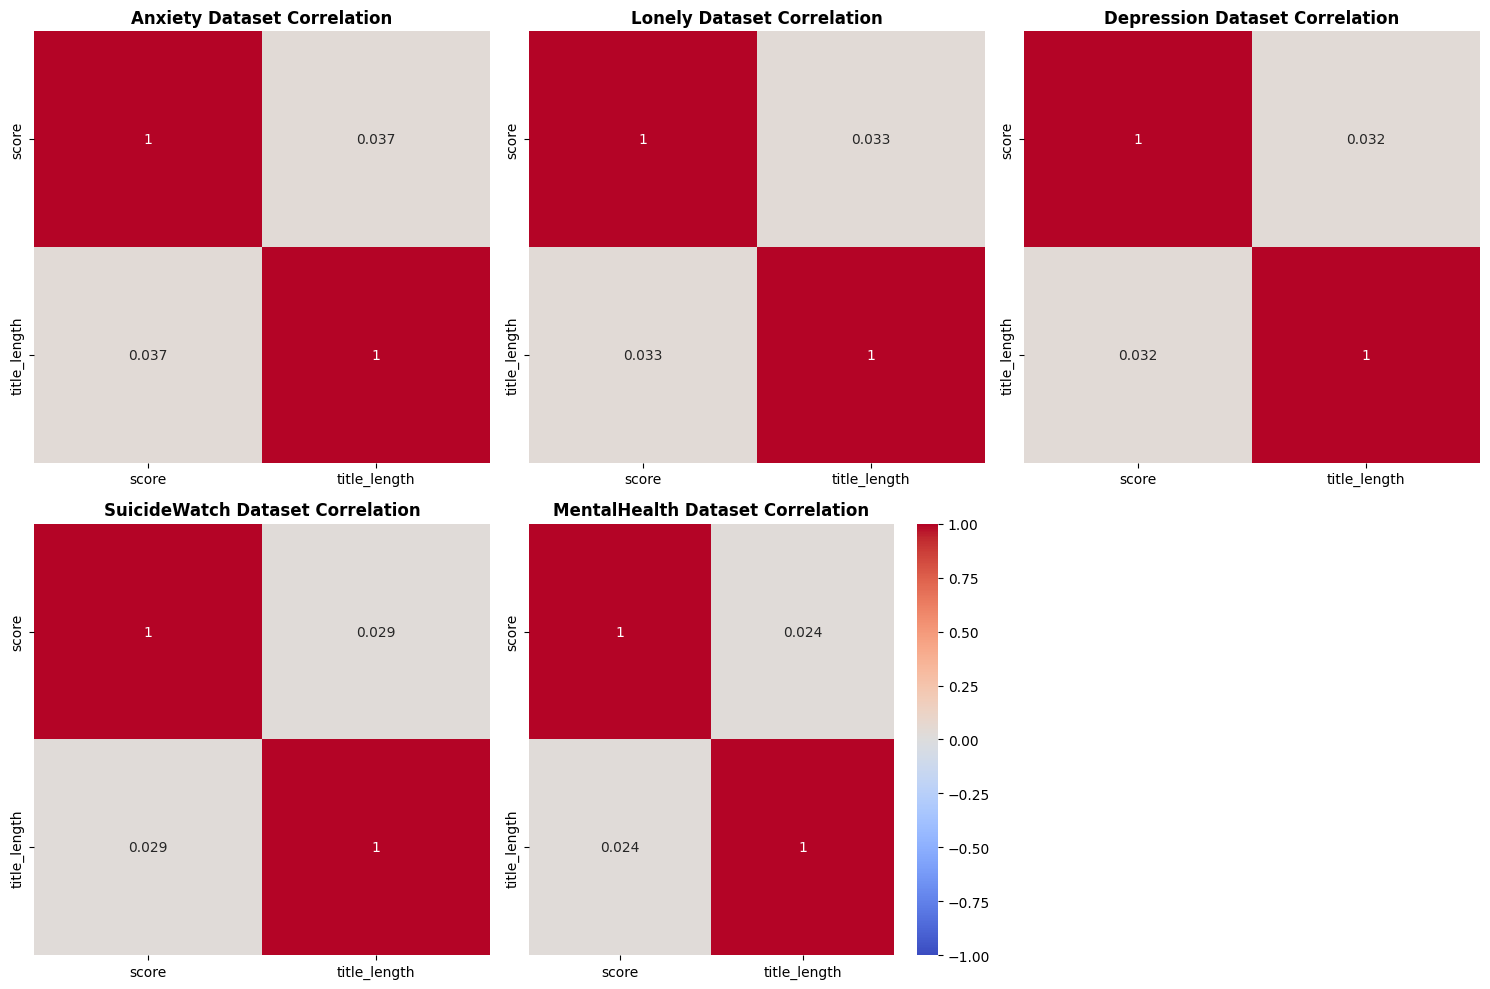

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datasets = {
    'Anxiety': df,
    'Lonely': lon_df,
    'Depression': dep_df,
    'SuicideWatch': sw_df,
    'MentalHealth': mh_df
}
for data in datasets.values():
    data['title_length'] = data['title'].astype(str).apply(len)

features = ['score', 'title_length']

plt.figure(figsize=(15, 10))
for i, (name, data) in enumerate(datasets.items(), 1):
    plt.subplot(2, 3, i)
    corr = data[features].corr(method='pearson')
    sns.heatmap(
        corr,
        annot=True,
        cmap='coolwarm',
        vmin=-1, vmax=1,
        cbar=(i == 5)
    )
    plt.title(f"{name} Dataset Correlation", fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


#### Observations :

The correlation heatmaps show that there is almost no relationship between the title length and the post score across all the mental health datasets, Anxiety, Lonely, Depression, SuicideWatch, and MentalHealth. The correlation values are very close to zero, indicating that longer or shorter titles do not significantly affect how well a post performs. This pattern is consistent across all subreddits, suggesting that post engagement depends more on the content or emotional expression rather than how long the title is.
